# Proyecto
## Clasificación de Sonidos Urbanos

**Universidad del Valle de Guatemala**\
**Facultad de Ingeniería**\
**Departamento de Ciencias de la Computación**\
**Deep Learning**

---
### Integrantes:
- Diego Leiva
- Pablo Orellana
- Maria Marta Ramirez
---

# Analisis Exploratorio

## Librerias

In [1]:
# Datos
import pandas as pd
import numpy as np

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio, display

# Audio
import librosa

## Metadatos

### Cargar CSV

In [2]:
metadata = pd.read_csv('data/UrbanSound8K/metadata/UrbanSound8K.csv')
display(metadata.head())

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


### Exploracion Inicial

In [3]:
display(metadata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


None

In [4]:
display(metadata.describe())

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


### Variables

El dataset contiene las siguientes columnas:

- `slice_file_name`: Nombre del archivo de audio.
- `fsID`: Identificador del archivo de sonido.
- `start`: Tiempo de inicio del corte de audio.
- `end`: Tiempo de finalización del corte de audio.
- `salience`: Nivel de prominencia del sonido.
- `fold`: Número de fold al que pertenece.
- `classID`: ID numérico que representa la clase de sonido.
- `class`: Etiqueta que representa el tipo de sonido (ej. "ladrido_de_perro" o "niños_jugando").

### Distribuciones

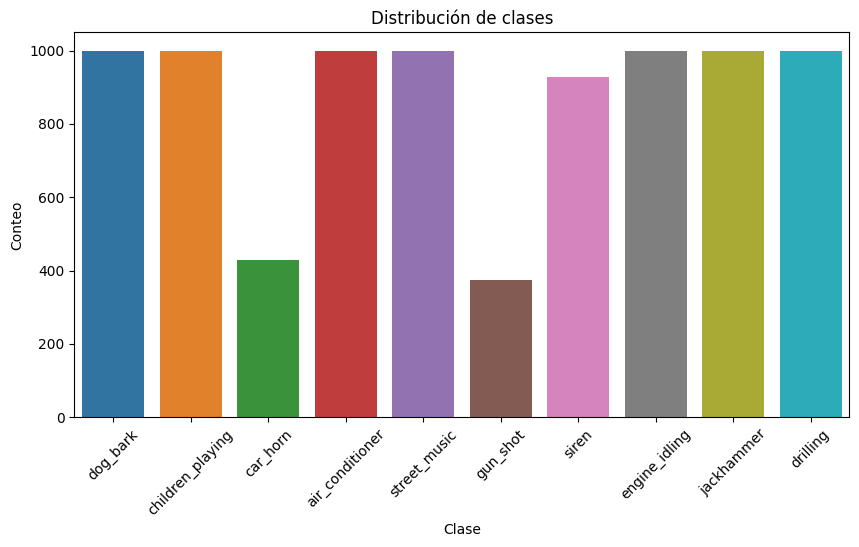

In [5]:
# Visualización de la distribución de clases
plt.figure(figsize=(10, 5))
sns.countplot(data=metadata, x='class', hue='class', legend=False, palette='tab10')
plt.title('Distribución de clases')
plt.xticks(rotation=45)
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.show()

Sera necesario aplicar tecnicas de data augmentation o modelos con penalizacion para las clases sin tanta representacion.

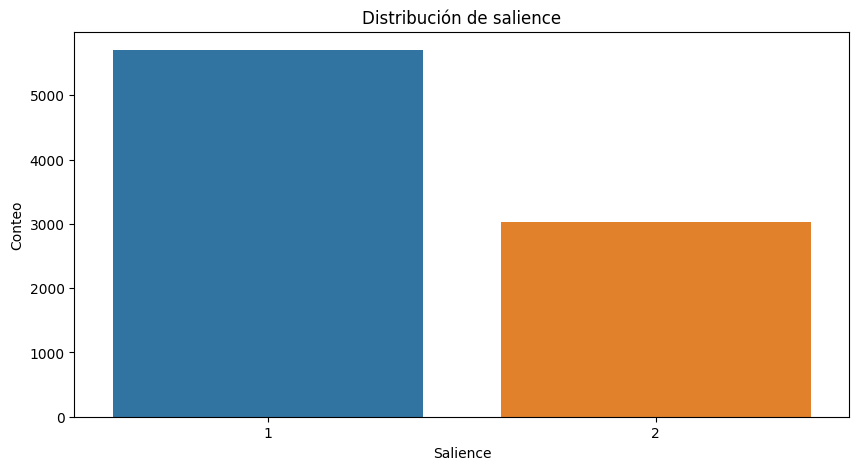

In [6]:
# Distribucion de Salience
plt.figure(figsize=(10, 5))
sns.countplot(data=metadata, x='salience', hue='salience', legend=False, palette='tab10')
plt.title('Distribución de salience')
plt.xlabel('Salience')
plt.ylabel('Conteo')
plt.show()

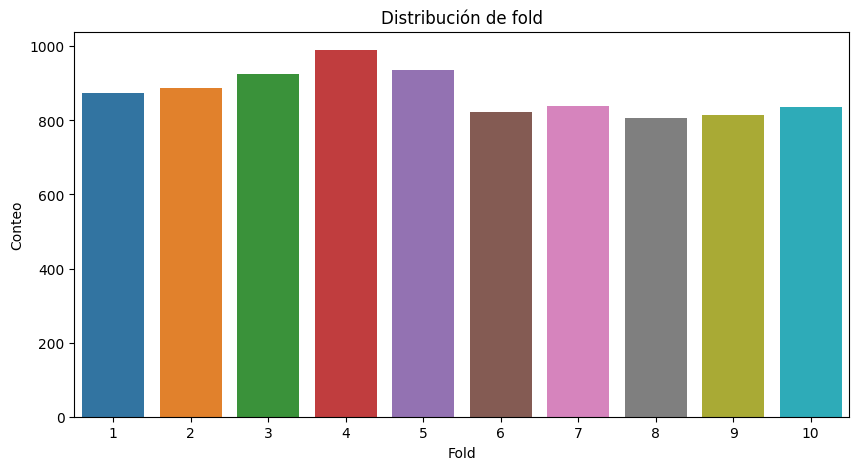

In [7]:
# Distribucion de fold
plt.figure(figsize=(10, 5))
sns.countplot(data=metadata, x='fold', hue='fold', legend=False, palette='tab10')
plt.title('Distribución de fold')
plt.xlabel('Fold')
plt.ylabel('Conteo')
plt.show()

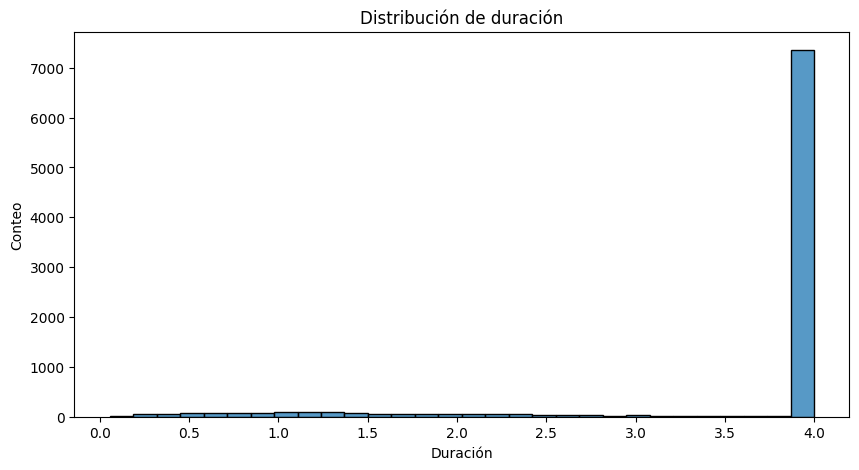

In [8]:
# Obtener la duración de cada archivo de audio
metadata['duration'] = metadata['end'] - metadata['start']
# Distribucion de Duracion
plt.figure(figsize=(10, 5))
sns.histplot(data=metadata, x='duration', bins=30)
plt.title('Distribución de duración')
plt.xlabel('Duración')
plt.ylabel('Conteo')
plt.show()

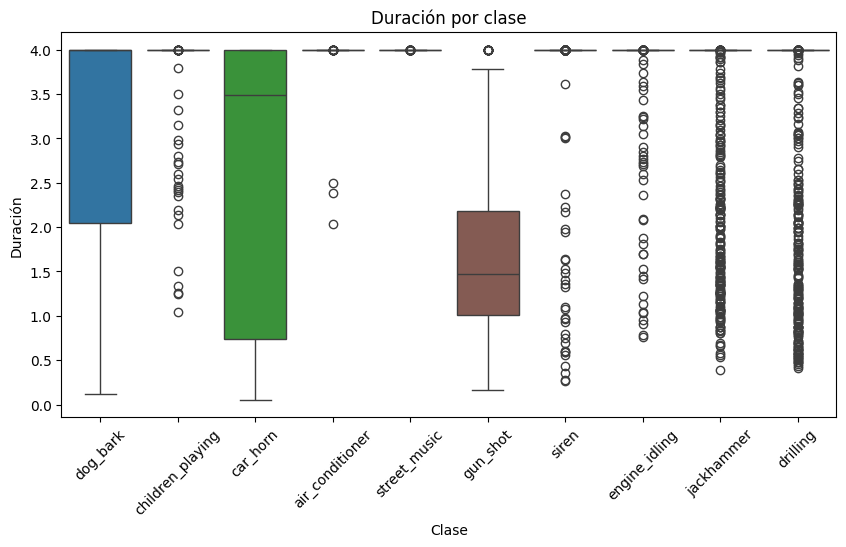

In [9]:
# Duracion por clase
plt.figure(figsize=(10, 5))
sns.boxplot(data=metadata, x='class', y='duration', hue='class', palette='tab10')
plt.title('Duración por clase')
plt.xticks(rotation=45)
plt.xlabel('Clase')
plt.ylabel('Duración')
plt.show()

## Exploracion de Audio

### Exploracion Inicial

In [10]:
# Obtener un archivo de audio de forma aleatoria
audio_sample = metadata.sample(n=1)
fold = audio_sample['fold'].values[0]
file_name = audio_sample['slice_file_name'].values[0]
audio_path = f'data/UrbanSound8K/audio/fold{fold}/{file_name}'

# Cargar el archivo de audio
audio_data, sample_rate = librosa.load(audio_path)

# Datos del archivo de audio
print(f"Clase: {audio_sample['class'].values[0]}")
print(f"Salience: {audio_sample['salience'].values[0]}")
print(f"Duración: {audio_sample['duration'].values[0]} s")
print(f"Sampling rate: {sample_rate} Hz")
print(f"Número de muestras: {len(audio_data)}")


# Incrustar el archivo de audio
Audio(filename=audio_path, autoplay=True)

Clase: air_conditioner
Salience: 2
Duración: 4.0 s
Sampling rate: 22050 Hz
Número de muestras: 88200


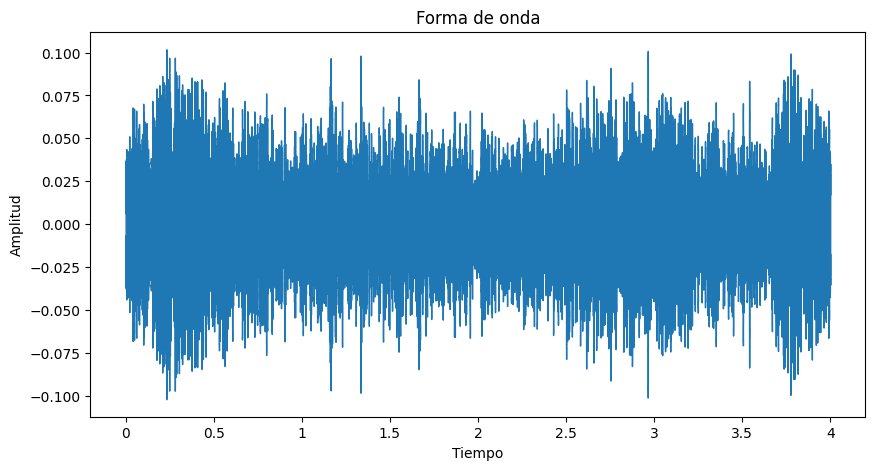

In [11]:
# Visualización de la forma de onda
plt.figure(figsize=(10, 5))
librosa.display.waveshow(audio_data, sr=sample_rate)
plt.title('Forma de onda')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.show()

### Espectograma y MFCC

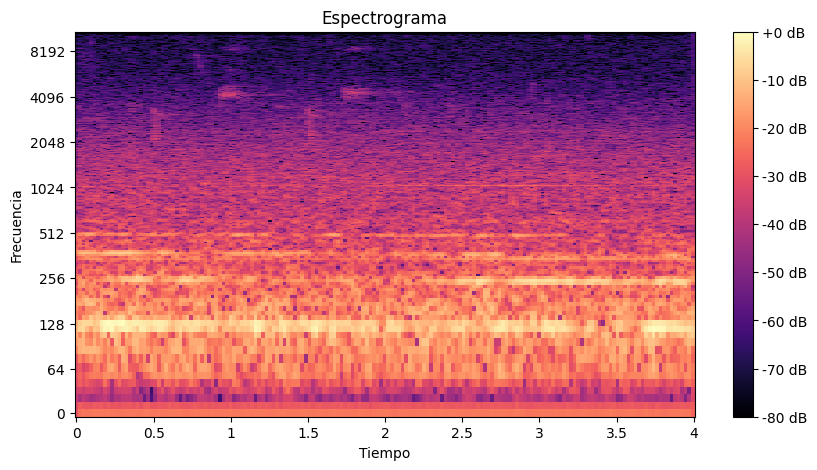

In [12]:
# Visualización del espectrograma
plt.figure(figsize=(10, 5))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref=np.max), y_axis='log', x_axis='time', sr=sample_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.show()

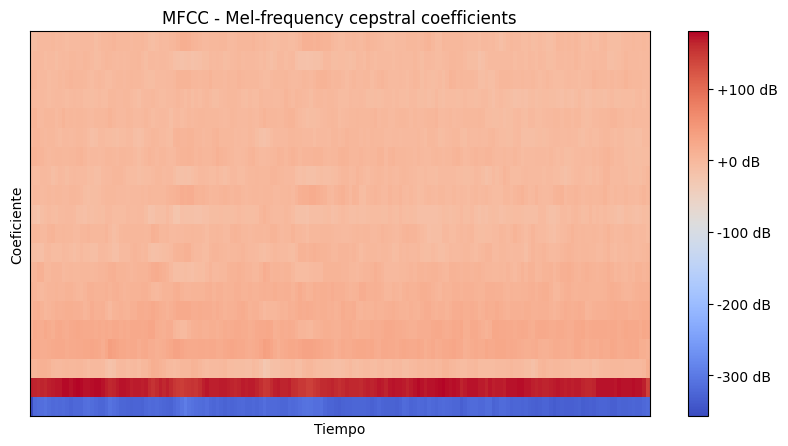

In [13]:
# Visualización del MFCC (Mel-frequency cepstral coefficients)
plt.figure(figsize=(10, 5))
mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, dct_type=2)
librosa.display.specshow(mfccs)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC - Mel-frequency cepstral coefficients')
plt.xlabel('Tiempo')
plt.ylabel('Coeficiente')
plt.show()

## Comparativa entre clases